This notebook is an introductory notebook created to explore O'Reilly Introduction to ML w/Python in the area of linear regressions https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [80]:
from sklearn.linear_model import LinearRegression
import mglearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [81]:
def regression_plot(X,y,theta_1=None,theta_0=None):
    # Simple plot of a linear regression with 1 feature
    # X,y - the training data set
    # theta_0,theta1 - the outputs of the model, again with only 1 feature 
    plt.scatter(X,y,color='g')
    if (theta_1 and theta_0):
        extend_line = abs(X.min() * 0.1)
        X_line = np.linspace(X.min() - extend_line,X.max() + extend_line,100)
        y_line = (theta_1 * X_line) + theta_0
        plt.plot(X_line,y_line,color='r')

In [82]:
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

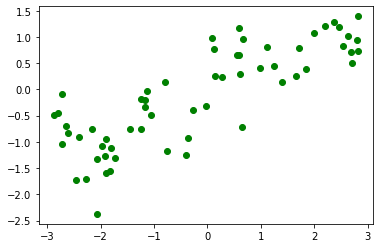

In [83]:
regression_plot(X,y)

In [84]:
lr = LinearRegression().fit(X_train, y_train)

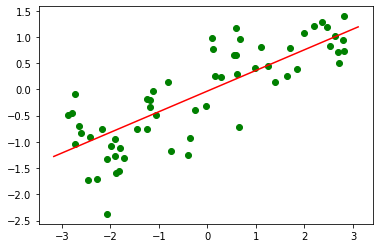

In [85]:
regression_plot(X,y,lr.coef_,lr.intercept_)

In [86]:
print("Train set score: {:.8f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.8f}".format(lr.score(X_test, y_test)))

Train set score: 0.67008903
Test set score: 0.65933686


Score is the coefficient of determination R2 defined as R2 = (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative.

Ridge regression focusses on regularization (linear least squares with l2 regularization), which is less likely to overfit.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [87]:
from sklearn.linear_model import Ridge
ridge10 = Ridge().fit(X_train, y_train)
print("Train set score: {:.8f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.8f}".format(ridge10.score(X_test, y_test)))

Train set score: 0.67005993
Test set score: 0.65779469


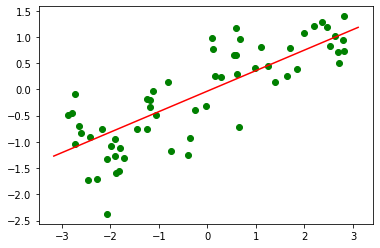

In [88]:
regression_plot(X,y,ridge10.coef_,ridge10.intercept_)

Decreasing alpha decreases the impact of regularization.

In [89]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Train set score: {:.8f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.8f}".format(ridge01.score(X_test, y_test)))

Train set score: 0.67008874
Test set score: 0.65918341


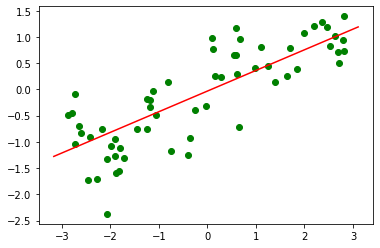

In [90]:
regression_plot(X,y,ridge01.coef_,ridge01.intercept_)

Lasso regression also focusses on regularization (L1 prior as regularizer aka the Lasso) by forcing some theta (coefficients) to zero.  This can lead to underfitting by removing too many features.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [91]:
from sklearn.linear_model import Lasso
lasso10 = Lasso().fit(X_train, y_train)
print("Train set score: {:.8f}".format(lasso10.score(X_train, y_train)))
print("Test set score: {:.8f}".format(lasso10.score(X_test, y_test)))

Train set score: 0.28528831
Test set score: 0.23759680


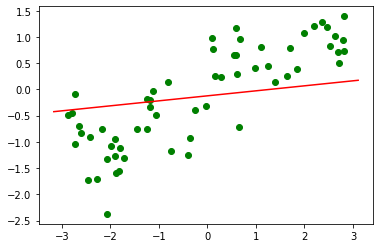

In [92]:
regression_plot(X,y,lasso10.coef_,lasso10.intercept_)

As with Ridge, we can decrease alpha to reduce regularization. The number of iterations is increased.

In [93]:
from sklearn.linear_model import Lasso
lasso01 = Lasso(alpha=0.1,max_iter=100000).fit(X_train, y_train)
print("Train set score: {:.8f}".format(lasso01.score(X_train, y_train)))
print("Test set score: {:.8f}".format(lasso01.score(X_test, y_test)))

Train set score: 0.66624102
Test set score: 0.63935113


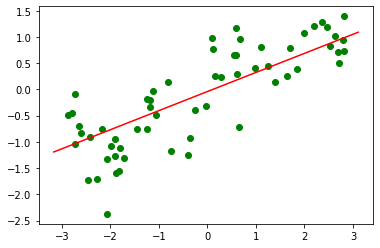

In [94]:
regression_plot(X,y,lasso01.coef_,lasso01.intercept_)